## Generalised Regression

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [17]:
ele_consumption = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/d109c892-faca-49fe-86b3-7e045f217d0a/total-electricity-consumption-us.csv')
ele_consumption.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [18]:
ele_consumption.shape

(51, 2)

In [19]:
ele_consumption.isnull().values.any()

False

In [22]:
size = len(ele_consumption.index)
index = range(0, size, 5)
train = ele_consumption[~ele_consumption.index.isin(index)]
test = ele_consumption[ele_consumption.index.isin(index)]
train.head()

,Year,Consumption
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651
6,1926,95164


In [41]:
x_train = np.array(train.Year.tolist()).reshape(-1, 1)
x_test = np.array(test.Year.tolist()).reshape(-1, 1)

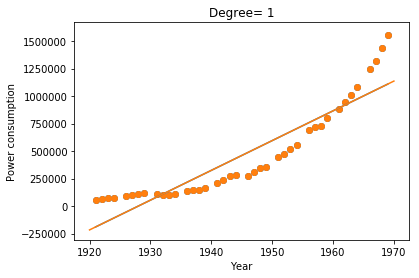

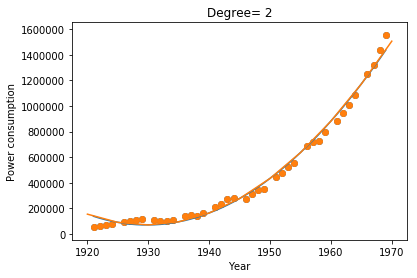

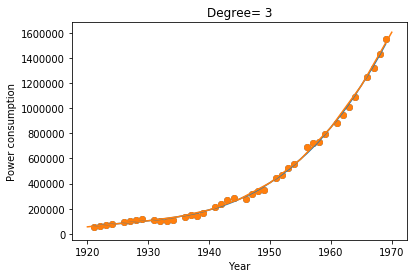

In [45]:
r2_train = []
r2_test = []
degrees = [1, 2, 3]

for degree in degrees:
    pipe = Pipeline([('poly_features', PolynomialFeatures(degree=degree)), ('model', LinearRegression())])
    pipe.fit(x_train, train.Consumption)
    y_pred = pipe.predict(x_text)
    r2_test.append(metrics.r2_score(test.Consumption, y_pred))
    y_train_pred = pipe.predict(x_train)
    r2_train.append(metrics.r2_score(train.Consumption, y_train_pred))
    
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")                                
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))
    
    # train data in blue
    ax.scatter(x_train, train.Consumption)
    ax.plot(x_train, y_train_pred)
    
    # test data
    ax.scatter(x_train, train.Consumption)
    ax.plot(x_test, y_pred)
    
    plt.show()

In [48]:
print(r2_train)
print(r2_test)

[0.8423747402176137, 0.990889674455328, 0.9979789884378093]
[0.816517046382681, 0.9876080502746136, 0.9984899918580936]
